In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('ab_browser_test.csv', sep=',')
data.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [17]:
exp_group = np.sum(data.ix[data['slot']=='exp', 'n_clicks' ])
ctrl_group = np.sum(data.ix[data['slot']=='control', 'n_clicks' ])

In [20]:
100*(exp_group-ctrl_group)/float(ctrl_group)

1.6135689824415806

In [22]:
exp_mean = data.ix[data['slot']=='exp', 'n_clicks' ].mean()
exp_std = data.ix[data['slot']=='control', 'n_clicks' ].std(ddof=1)/np.sqrt(data.shape[0])

11.584000994388806

In [31]:
len(data)

566134

In [42]:
exp_group =  data[data['slot']=='exp'].n_clicks.values
ctrl_group = data[data['slot']=='control'].n_clicks.values

def get_bootstrap_samples(data1, n_samples):
    indices = np.random.randint(0, len(data1), (n_samples, len(data1)))
    print len(indices[0])
    samples = data1[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

np.random.seed(0)
exp_mean_scores = map(np.mean, get_bootstrap_samples(exp_group, 1000))
ctrl_mean_scores = map(np.mean, get_bootstrap_samples(ctrl_group, 1000))

exp_median_scores = map(np.median, get_bootstrap_samples(exp_group, 1000))
ctrl_median_scores = map(np.median, get_bootstrap_samples(ctrl_group, 1000))

print "95% confidence interval for the experimental median group:",  stat_intervals(exp_median_scores, 0.05)
print "95% confidence interval for the control median group:",  stat_intervals(ctrl_median_scores, 0.05)
print "95% confidence interval for the experimental mean group:",  stat_intervals(exp_mean_scores, 0.05)
print "95% confidence interval for the control mean group:",  stat_intervals(ctrl_mean_scores, 0.05)

281580
284554
281580
284554
95% confidence interval for the ILEC median repair time: [ 5.  5.]
95% confidence interval for the CLEC median repair time: [ 4.  4.]
95% confidence interval for the ILEC median repair time: [ 11.5086867   11.66089388]
95% confidence interval for the CLEC median repair time: [ 11.20795095  11.35742732]


In [43]:
delta_median_scores = map(lambda x: x[1] - x[0], zip(exp_median_scores, ctrl_median_scores))
print "95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05)

95% confidence interval for the difference between medians [-1. -1.]


In [44]:
delta_median_scores = map(lambda x: x[1] - x[0], zip(exp_mean_scores, ctrl_mean_scores))
print "95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05)

95% confidence interval for the difference between medians [-0.40475697 -0.19172563]


In [ ]:
exp_mean_scores = map(np.mean, get_bootstrap_samples(exp_group, 1000))
ctrl_mean_scores = map(np.mean, get_bootstrap_samples(ctrl_group, 1000))

Populating the interactive namespace from numpy and matplotlib


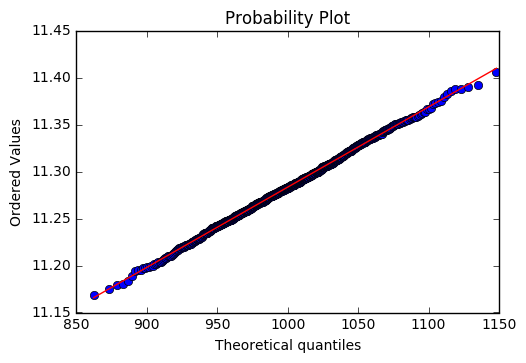

In [51]:
%pylab inline
from statsmodels.stats.weightstats import *
pylab.figure(figsize=(12,8))
pylab.subplot(2,2,1)
stats.probplot(ctrl_mean_scores, dist="chi2",sparams = (len(ctrl_mean_scores)-1), plot=pylab)
##pylab.subplot(2,2,2)
##stats.probplot(exp_mean_scores, dist="chi2", plot=pylab)
pylab.show()